# Logistic Regression
Tamsin Low - 31005 Machine Learning Spring UTS 2023

## Objective
The objective of this study is to implement a logistic regression 2-class classification model. This involves understanding and implementing the
- Logit and logistic functions
- Loss function and optimisation process

## Overview
- Logistic Regression is a type of Generalised Linear Model and is used for binary classification.
- The output of the model gives a probability between 0 and 1.
(2018, Starmer)
- It is useful as many social phenoma are discrete or qualitative rather than continuous or quantitative in nature. E.g. an event occurs or it does not occur, a person makes one choice but not the other.
- Binary discrete phenomena usually take the form of dichotomous indicator or dummy variable. Using 1 and 0 is advantageous as the mean of a dummy variable equals the proportion of cases with a value of 1 and can be interpreted as a **probability** (Pampel, 2021).


## Logit Function
### Linear Models
Before looking into the logit function, I'll first review the form of linear models since they'll be related to the logit function.

The linear model equation (OpenAI, 2023) for a prediction of a single sample is given as

$$\hat{y}^{(i)} = b + w_1 x_1^{(i)} + w_2 x_2^{(i)} + \ldots + w_n x_n^{(i)}$$

This can be written in vectorised format as
$$\hat{y} = \mathbf{w} \cdot \mathbf{X} + b$$

Where
- $\mathbf{w}$ is the vector of weights
- $\mathbf{X}$ is the matrix of input features
- $\mathbf{b}$ is the bias term

Using linear regression for binary classification can be problematic because by definition, probabilities range from 0 to 1. For linear regression, the range is positively and negatively infinite, so this model could potentially give probabilities below 0 and above 1 where these values can't be interpreted (Pampel, 2021).


### Logit function
The purpose of the logit function is to transform the probabilities to represent their relationship with $\textbf{X}$ as linear rather than nonlinear (Pampel, 2021).

The logit function, also known as the log-odds function is used to model the probability $y = 1$ as a linear combination of the input features (OpenAI, 2023).

$$\text{logit}(p) = \ln\left(\frac{1-p}{p}\right) = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n$$

Where:
- $\text{logit}(p)$ represents the log-odds of the probability $p$ of the positive class $(y = 1)$.
- $p$ is the probability of the positive class.
- $\text{ln}$ denotes the natural logarithm. (As a disclaimer $\log$ mentioned in this study also represents the natural logarithm)
- $b$ is the bias term.
- $w_1, w_2, \ldots , w_n$ are the weights associated with the input features $x_1, x_2, \ldots , x_n$

It is also known as the log-odds function because you first take the ratio of $p$ to $1-p$ (the odds of the outcome), and then take the natural logarithm of the odds (Pampel, 2021).
$$\text{logit}(p) = \ln\left(\frac{1-p}{p}\right)$$

The logit function transforms the probability $p$ into a real-valued range from negative infinity to positive infinity. It is also known as the "log-odds" because it represents the logarithm of the odds of the event occurring.

Since the linear model also represents the logit function, one can reshape logistic regression as to learning the values of the weights and bias such that the logit function provides a good fit to the data (Starmer, 2018).


I'll be graphing different functions in this study. Many of these functions only require one input so I'll make plotting the graph into a function so I can reuse this code.

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def show_one_variable_function_graph(
        function: callable,
        title: str,
        x_label: str,
        y_label: str,
        x_domain: tuple,
        y_value_axis_line: float = None,
        num_of_x_values: int = 100
) -> None:
    """Plots a function that requires one input."""

    # Create a range of x values
    x = np.linspace(x_domain[0], x_domain[1], num_of_x_values)

    # Calculate y values using the given function
    y = function(x)

    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=title, color='blue')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if y_value_axis_line is not None:
        plt.axhline(y_value_axis_line, color='red', linestyle='--', label='Threshold (0.5)')
    plt.legend()
    plt.grid(True)
    plt.show()


I'll first graph the logit function which uses probability as its input. It shows the nonlinear relationship between probability and the logit function.

C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\1240532906.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.log(probability/(1-probability))
C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\1240532906.py:3: RuntimeWarning: divide by zero encountered in log
  return np.log(probability/(1-probability))


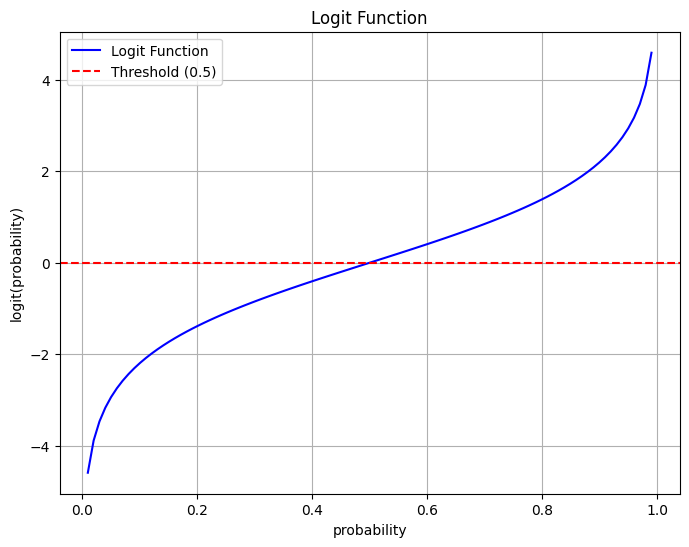

In [111]:
def logit_function(probability: float) -> float:
    """Otherwise known as the log-odds function"""
    return np.log(probability/(1-probability))

show_one_variable_function_graph(
    logit_function,
    title="Logit Function",
    x_label="probability",
    y_label="logit(probability)",
    x_domain=(0, 1),
    y_value_axis_line=0
)

### Probabilities vs Odds
Pamper (2021) examine the two concepts of probabilities and odds, when highlighting the usefulness of the logit function.
Several takeaways I found were:
- Probabilities vary between 0 and 1, and express the likelihood of an outcome as a proportion of both occurrences and nonoccurrences.
- Odds $\frac{p} {1-p}$ express the likelihood of an occurrence relative to the likelihood of a nonoccurrence.
- Both have a lower limit of 0, and both express the increasing likelihood of an outcome with increasing large positive numbers.
- Odds have no upper bound.

From this, I'll graph the odds using probability to see their relationship.

C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\3356931175.py:2: RuntimeWarning: divide by zero encountered in divide
  return probability / (1 - probability)


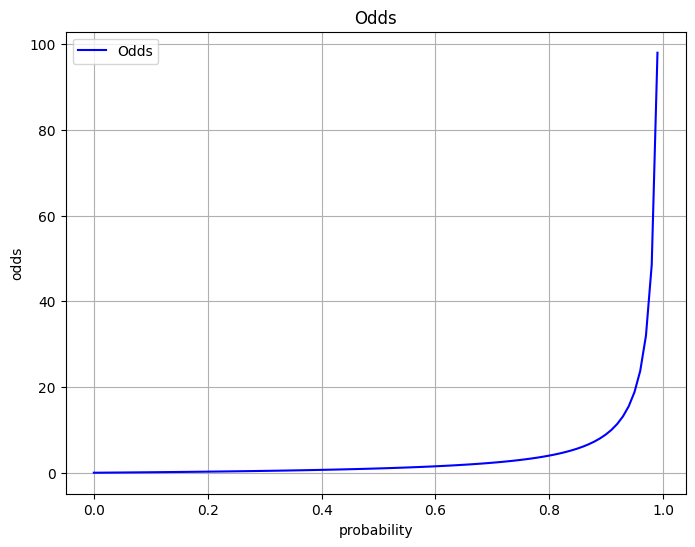

In [112]:
def odds(probability: float) -> float:
    return probability / (1 - probability)

show_one_variable_function_graph(
    odds,
    title="Odds",
    x_label="probability",
    y_label="odds",
    x_domain=(0, 1)
)

Another way to examine the relationship between probability $p$ and odds $o$ is to rearrange the odds equation
$$o = \frac{p} {1-p}$$

to make probability the subject
$$ p = \frac{o} {1+o}$$

Graphing this relationship shows that the odds can have an infinite positive value, whereas the probabilities have an upper bound of 1

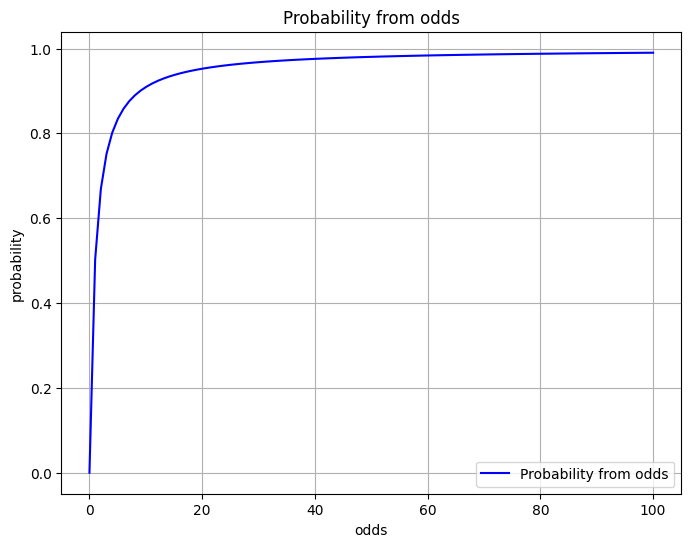

In [113]:
def probability_from_odds(odds: float) -> float:
    return odds / (1 + odds)

show_one_variable_function_graph(
    probability_from_odds,
    title="Probability from odds",
    x_label="odds",
    y_label="probability",
    x_domain=(0, 100)
)

Relying on odds compared to probability is beneficial since odds don't have an upper boundary. This is the first step for creating the logit transformation.

### Log of odds
We next take the natural log of odds to eliminate the lower bound of 0. This is because the log of odds is just a log function and we can see the range of a log function is positively and negatively infinite.

C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\3914641725.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(odds)


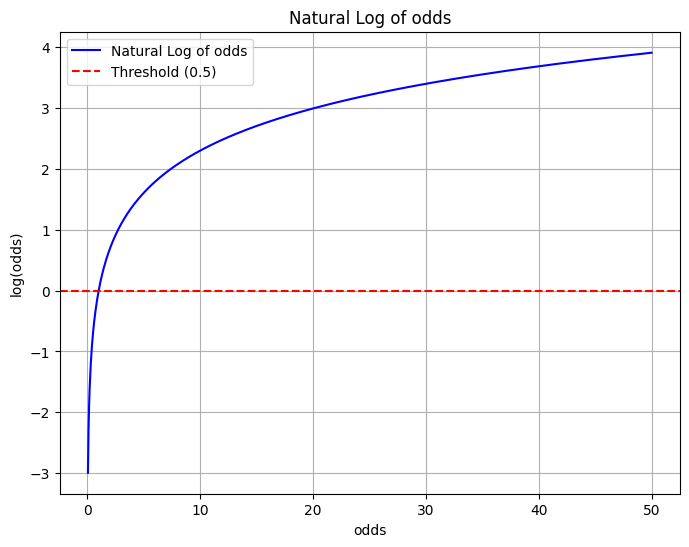

In [114]:
def log_of_odds(odds: float) -> float:
    return np.log(odds)

show_one_variable_function_graph(
    log_of_odds,
    title="Natural Log of odds",
    x_label="odds",
    y_label="log(odds)",
    x_domain=(0, 50),
    num_of_x_values=1000,
    y_value_axis_line=0
)

## Logistic function
> The logistic function defines a relationship between the values of $\textbf{X}$ and the S-shaped curve in probabilities.

### Deriving the logistic function
We can derive the logistic function from the logit function.
$$\text{logit}(p) = \ln\left(\frac{1-p}{p}\right)$$
The logit function has a few properties
- It has no lower or upper bound for its range
- It is symmetric around the midpoint probability of 0.5
- Same changes in probabilities results in different changes in logits. In other words, small differences in probabilities result in increasingly larger differences in logits when the probabilties are near the bounds of 0 and 1.

Now the relationship between the dependent variables $\textbf {X}$ is nonlinear. However, the relationship between the dependent variables $\textbf{X}$ and logit function can be viewed as linear. In other words,

$$\ln\left(\frac{1-p}{p}\right) = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n$$

and using vector notation this is
$$\ln\left(\frac{1-p}{p}\right) = b + \textbf{w}\textbf{X}$$

Now lets rearrange the equation to make the probability $p$ the subject.
$$\frac{p}{1-p} = e^{b + \textbf{w}\textbf{X}}$$
$$p = (1-p)e^{b + \textbf{w}\textbf{X}}$$
$$p = e^{b + \textbf{w}\textbf{X}} - pe^{b + \textbf{w}\textbf{X}}$$
$$p + pe^{b + \textbf{w}\textbf{X}} = e^{b + \textbf{w}\textbf{X}}$$
$$p(1 + e^{b + \textbf{w}\textbf{X}}) = e^{b + \textbf{w}\textbf{X}}$$
$$p = \frac {e^{b + \textbf{w}\textbf{X}}} {1 + e^{b + \textbf{w}\textbf{X}}}$$

Let our logit function be denoted as $z$. Since the logit function equals $b + \textbf{w}\textbf{X}$ we can substitute in $z$

$$p = \frac {e^{z}} {1 + e^{z}}$$

Recall that the probability can be expressed as odds.
$$ p = \frac {o} {1+o}$$
which means that
$$ p = \frac {e^{z}} {1 + e^{z}} = \frac {o} {1+o}$$

meaning that odds can be expressed as $e^z$ i.e. $o = e^z$

#### Another way of expressing the logistic function
We can rewrite
$$p = \frac {e^{z}} {1 + e^{z}}$$

using index laws as $e^z = (e^{-z})^{-1}$

Substituting this into the equation gives
$$p = \frac {(e^{-z})^{-1}} {1 + e^z}$$
$$p = \frac {1} {(e^{-z})(1 + e^z)}$$
$$p = \frac {1} {e^{-z} + e^{-z}e^z}$$
$$p = \frac {1} {e^{-z} + e^{-z + z}}$$
$$p = \frac {1} {e^{-z} + e^{0}}$$
$$p = \frac {1} {e^{-z} + 1}$$
$$p = \frac {1} {1 + e^{-z}}$$

This relationship of the probability and the logit function is our logistic function. This logistic function also happens to be a sigmoid function.


### Sigmoid function
In the context of logistic regression, the sigmoid function $sigma(z)$ and the logit function ($\text{logit}(p)$ are inverses of each other. This means that the probability $p$ can be calculated when the sigmoid function is applied to the output of the logit function (OpenAI, 2023).

As already demonstrated, solving for $p$ in the equation
$$\ln\left(\frac{1-p}{p}\right) = b + w_1x_1 + w_2x_2 + \ldots + w_nx_n = z$$

yields

$$p = \frac{e^z} {e^z + 1}$$

Which is otherwise known as the sigmoid function $\sigma(z)$.

$$\sigma(z) = \frac{1} {1 + e^{-z}} = \frac{e^z} {e^z + 1}$$


The **sigmoid function** has the range of 0 to 1.

This is what it graphically looks like

![Sigmoid Graph](images/sigmoid_graph.png)



Implementing the sigmoid function is therefore quite simple,


In [115]:
def sigmoid_function(x: float) -> float:
    return 1 / (1 + np.exp(-x))

Alternatively,

In [116]:
def sigmoid_function_2(x: float) -> float:
    return np.exp(x) / (1 + np.exp(x))

Graphing this function confirms it's the sigmoid function

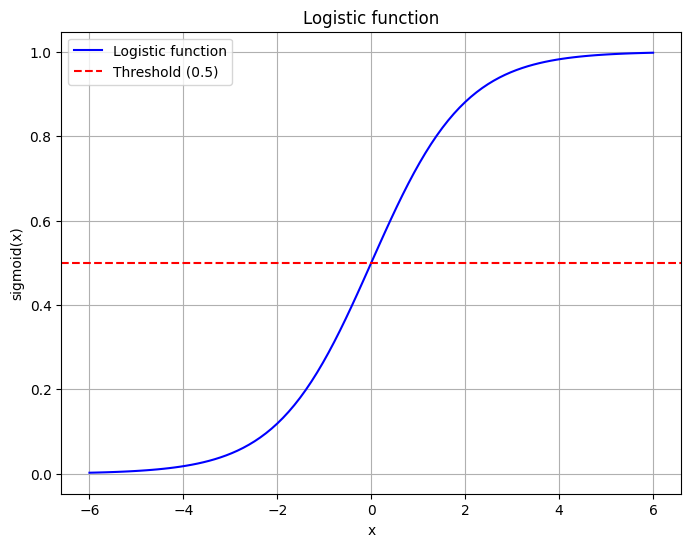

In [117]:
show_one_variable_function_graph(
    sigmoid_function,
    title="Logistic function",
    x_label="x",
    y_label="sigmoid(x)",
    x_domain=(-6,6),
    y_value_axis_line=0.5
)

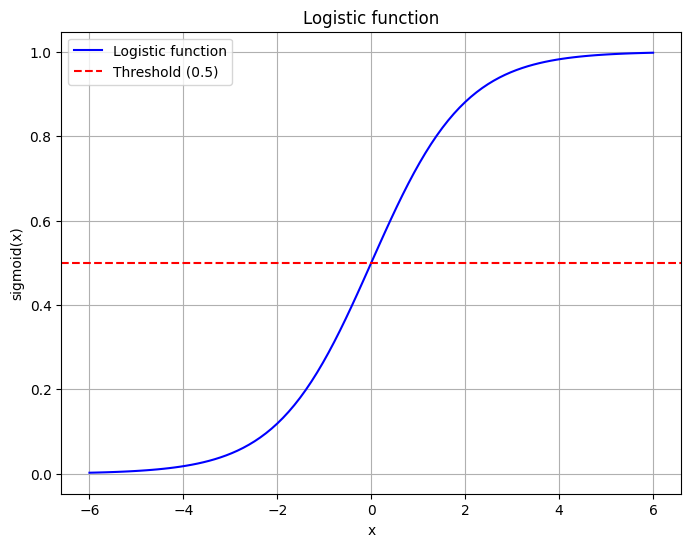

In [118]:
show_one_variable_function_graph(
    sigmoid_function_2,
    title="Logistic function",
    x_label="x",
    y_label="sigmoid(x)",
    x_domain=(-6,6),
    y_value_axis_line=0.5
)


## Computationally stable sigmoid function
Numerical overflow can occur for very large positive and negative values of x.
This is because the exponent result gets very large (Vieira, 2014).
In other words:
$$ \lim_{x \to \infty}e^x = \infty$$
and
$$ \lim_{x \to -\infty}e^{-x} = \infty$$



The numerical overflow can be demonstrated in the sigmoid function.

For $\sigma(x) = \frac{1} {1 + e^{-x}}$

The overflow occurs when x is a large negative number.

In [119]:
x = -1e10
sigmoid_function(x)

C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\1970046184.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.0

For $\sigma(x) = \frac{e^x} {1 + e^x}$

The overflow occurs when x is a large positive number.


In [120]:
x = 1e10
sigmoid_function_2(x)

C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\3792178146.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\tyylo\AppData\Local\Temp\ipykernel_9348\3792178146.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.exp(x) / (1 + np.exp(x))


nan

To ensure the numerical overflow doesn't occur, simply use an if-else statement use to corresponding sigmoid function as

$\sigma(x) = \frac{1} {1 + e^{-x}}$ handles positive overflow

$\sigma(x) = \frac{e^x} {1 + e^x}$ handles negative overflow

In [121]:
def stable_sigmoid_function(x: float) -> float:
    if x >= 0:
        return 1 / (1 + np.exp(-x))
    else:
        return np.exp(x) / (1 + np.exp(x))

In [122]:
stable_sigmoid_function(1e10)

1.0

In [123]:
stable_sigmoid_function(-1e10)

0.0

## Optimising the model parameters
There are different algorithms that can be used to optimise the model parameters (in this case the weights and bias). I will be using gradient descent since understanding it is important as many other optimisation algorithms build upon it.
With gradient descent, we try to minimise the model's prediction error.

Before discussing gradient descent let's take a look at how to calculate the logistic regression error

### Loss function
From OpenAI's (2023) ChatGPT Binary Cross-Entropy Loss also known as Log Loss or Cross-Entropy Loss, is a commonly used loss function in logistic regression.

It measures the dissimilarity between the predicted probabilities (output of the logistic regression model) and the actual binary labels.

The formula is

$$L_{CE}(\hat{y}, y) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]$$

Where:
- $N$ is the number of samples in the dataset.
- $y^{(i)}$ is the actual binary label (0 or 1) for the $i$th sample.
- $\hat{y}^{(i)}$ is the predicted probability of the positive class (class 1) for the $i$th sample.

We can examine $y^{(i)}log(\hat{y}^{(i)}) + (1-y^{(i)})log(1-\hat{y}^{(i)})$ further as $y^{(i)}$ can only be 0 or 1.

- When $y^{(i)} = 0$ the expression becomes $\log(1-\hat{y}^{(i)})$
- When $y^{(i)} = 1$ the expression becomes $\log(\hat{y}^{(i)})$

The Binary Cross-Entropy Loss has several important properties:

1. It penalizes large errors more heavily. If the predicted probability is close to the true label, the loss is small, but if the predicted probability is far from the true label, the loss increases rapidly.
2. It encourages the model to make confident predictions. The logarithmic terms in the loss function penalize uncertainty in the predictions.
3. It is differentiable, making it suitable for gradient-based optimization algorithms like stochastic gradient descent (SGD) or Adam.


From this, the cross entropy loss function can be coded

In [124]:
def compute_loss(y_true: np.ndarray, y_pred: np.ndarray):
    # binary cross entropy loss

    # Avoid division by zero by adding a small epsilon value
    y_zero_loss = y_true * np.log(y_pred)
    y_one_loss = (1-y_true) * np.log(1 - y_pred)

    return -np.mean(y_zero_loss + y_one_loss)

#### Numerical stability
With this function, there are numerical instability issues when the predicted probabilities are very close to 0 or 1.

This is because the $\log 0$ approaches negative infinity.
In other words

$$ \lim_{\hat{y} \to 0}\log \hat{y} = -\infty$$
and
$$ \lim_{\hat{y} \to 1}\log (1-\hat{y}) = -\infty$$

This negative infinity can lead to program crashes if not handled properly.
To prevent this, a small constant (epsilon) is included when calculating the Binary Cross-Entropy Loss to limit the "negative infinity" value.

In [125]:
def compute_loss(y_true: np.ndarray, y_pred: np.ndarray):
    # binary cross entropy loss

    # Avoid division by zero by adding a small epsilon value
    epsilon = 1e-9
    y_zero_loss = y_true * np.log(y_pred + epsilon)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + epsilon)

    return -np.mean(y_zero_loss + y_one_loss)


#### Derivation
Jurafsky (2021) provided a good explanation on deriving cross entropy loss.

We'll start with deriving the cross-entropy loss for a single observation $x$.
Here, the goal is to maximise the probability of the correct label $p(y|x)$

According to the Bernoulli probability model this is

$$p(y|x) = \hat{y}^y(1-\hat{y})^{1-y}$$

Taking the log of both sides is helpful for the maths (as derivatives in logs and additions are easier)
$$\log p(y|x) = \log(\hat{y}^y(1-\hat{y})^{1-y})$$
$$\log p(y|x) = \log(\hat{y}^y) + \log((1-\hat{y})^{1-y})$$
$$\log p(y|x) = y\log \hat{y} + (1-y)\log (1-\hat{y})$$

So now we want to maximise $\log p(y|x)$ as this will also maximise $p(y|x)$

Another way of looking at this is minimising the negative of this function. i.e. $$- \log p(y|x) = -[y\log \hat{y} + (1-y)\log (1-\hat{y})]$$

This is then the binary cross entropy loss for the single observation.

$$L_{CE}(\hat{y}, y) = -[y\log \hat{y} + (1-y)\log (1-\hat{y})]$$

Then to find the average cross entropy loss, the individual cross entropy loss for each sample is summed, then divided by the number of samples.

$$L_{CE}(\hat{y}, y) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]$$



### Gradient Descent
The optimal weights and bias in the logit function occur when the loss function is minimised.
Gradient Descent is an iterative optimisation algorithm used to minimise a loss function and find the minimum of a function. The key idea behind gradient descent is to move in the direction of the steepest decrease in the loss function to reach a minimum.

To find the gradient of the loss function, its derivative must be calculated. For the cross entropy loss function the partial derivatives are as follows (OpenAI, 2023).

Partial derivative with respect to weight $w_j$
$$\frac{\partial L}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} \left(\hat{y}^{(i)} - y^{(i)}\right) x_j^{(i)}$$

Partial derivative with respect to bias $b$
$$\frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^{N} \left(\hat{y}^{(i)} - y^{(i)}\right)$$


##### Deriving the Partial Derivatives
For my own interest I had a go at deriving the partial derivatives from the Bernoulli probability model.
 Here, I
  - denoted the cross-entropy loss as $J$
  - used the chain rule

First I calculated $\frac {\partial J} {\partial {\hat {y}}}$ as this is used when calculating both of the partial derivatives.

![Partial Derivative J and y-hat](images/partial_derivative_helper.jpg)

Next I calculated the partial derivative with respect to weight

![Partial Derivative with respect to weight](images/partial_derivative_weight.jpg)

Finally, I calculated the partial derivative with respect to bias.

![Partial derivative bias](images/partial_derivative_bias.jpg)

Here the partial derivative with respect to the bias can be interpreted as the average of the difference in true and predicted values.
Then the partial derivative with respect to weight can be interpreted as the averages of the input values multiplied by these differences.
Implementing this is therefore quite straightforward. Additionally, the partial derivative with respect to weight will return an array as the weight is also a vector.

In [126]:
def calculate_gradient_bias(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    differences = y_pred - y_true
    gradient_bias = np.mean(differences)

    return gradient_bias

def calculate_gradients_weights(x: np.ndarray, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray[float]:
    differences = y_pred - y_true
    gradients_weights = np.matmul(x.transpose(), differences)
    gradients_weights = np.array([np.mean(np.mean(gradient) for gradient in gradients_weights)])

    return gradients_weights

These can be combined into the one method since they both use the differences.

In [127]:
def compute_gradients(x: np.ndarray, y_true: np.ndarray, y_pred: np.ndarray) -> tuple[np.ndarray[float], float]:
    """Derivative of binary cross entropy"""
    differences = y_pred - y_true

    gradient_bias = np.mean(differences)

    gradients_weights = np.matmul(x.transpose(), differences)
    gradients_weights = np.array([np.mean(np.mean(gradient) for gradient in gradients_weights)])

    return gradients_weights, gradient_bias

To update the model's parameters, the parameters are adjusted in the opposite direction of the gradient to minimise the loss. In other words,

$$\text{New Parameter Value} = \text{Old Parameter Value} - \alpha \times \text{Gradient}$$

Here, $\alpha$ is the learning rate, which determines how large the parameter updates should be in each iteration.

Generally, the learning rate should be fairly small otherwise the local minimum may be 'missed' when the parameter is updated.
However, if the learning rate is too small it will take a long time to compute.

The minus sign indicates that we want to move in the direction of decreasing loss.
When the gradient is positive the parameter value is decreased and when the gradient is negative the parameter value is increased.

In [128]:
def calculate_new_parameter(old_parameter: float, gradient: float) -> float:
    new_parameter = old_parameter - gradient
    return new_parameter

In [129]:
old_parameters = [-1.2, 0, 10]
positive_gradients = [1, 22, 0.5]
negative_gradients = [-1, -22, -0.5]

In [130]:
# Use positive gradients
print("When the gradients are positive the parameters decrease")
for i in range(len(old_parameters)):
    old_parameter = old_parameters[i]
    gradient = positive_gradients[i]
    new_parameter = calculate_new_parameter(old_parameter, gradient)
    print(f"{old_parameter=} {new_parameter=}")

When the gradients are positive the parameters decrease
old_parameter=-1.2 new_parameter=-2.2
old_parameter=0 new_parameter=-22
old_parameter=10 new_parameter=9.5


In [131]:
# Use negative gradients
print("When the gradients are negative the parameters increase")
for i in range(len(old_parameters)):
    old_parameter = old_parameters[i]
    gradient = negative_gradients[i]
    new_parameter = calculate_new_parameter(old_parameter, gradient)
    print(f"{old_parameter=} {new_parameter=}")

When the gradients are negative the parameters increase
old_parameter=-1.2 new_parameter=-0.19999999999999996
old_parameter=0 new_parameter=22
old_parameter=10 new_parameter=10.5


In [132]:
# Use 0 gradient
print("When the gradients are 0 the parameters stay the same")
for i in range(len(old_parameters)):
    old_parameter = old_parameters[i]
    gradient = 0
    new_parameter = calculate_new_parameter(old_parameter, gradient)
    print(f"{old_parameter=} {new_parameter=}")


When the gradients are 0 the parameters stay the same
old_parameter=-1.2 new_parameter=-1.2
old_parameter=0 new_parameter=0
old_parameter=10 new_parameter=10


Updating the parameters is therefore quite simple

In [133]:
def update_parameters(
        weights: np.ndarray,
        bias: float,
        gradient_weights: np.ndarray,
        gradient_bias: np.ndarray,
        learning_rate=0.1
) -> None:
    weights = weights - learning_rate * gradient_weights
    bias = bias - learning_rate * gradient_bias

### Convergence criteria

Convergence criteria can be used to terminate the gradient descent process in training. This is useful in practice for several reasons such as

- Efficient Resource usage: It ensures that the optimisation process does not continue indefinitely and consume significant computational resources
- Preventing Overfitting: The algorithm might continue learning until it perfectly fits the training data, leading to potential overfitting. The convergence criterion helps ensure the model generalises well to unseen data by stopping the learning process when it reaches a good solution.
- Avoiding Numerical Instability: Numerical instability or precision issues can arise if the algorithm continues indefinitely since the gradient and loss values can become very small.

There are a few choices for the convergence criterion.

#### Gradient Magnitude
The gradient magnitude can also be used as a convergence criterion since a 0 gradient indicates a turning point.

To calculate the gradient magnitude from the partial derivatives of the cost function, you take the Euclidean norm (L2 norm) of the gradient vector. Here, the partial derivatives make up the gradient vector.

The gradient vector is constructed by stacking the partial derivatives. If you have $n$ parameters $w_1 , w_2 ,\ldots, w_n$ and a bias term $b$, the gradient vector would have $n+1$ components.
$$\[
\nabla J(\theta) = \left[ \frac{\partial J}{\partial w_1}, \frac{\partial J}{\partial w_2}, \ldots, \frac{\partial J}{\partial w_n}, \frac{\partial J}{\partial b} \right]
\]
$$

Each component of the gradient vector represents the slope or rate of change of the cost function in the corresponding direction in the parameter space.

The gradient magnitude is calculated as the Euclidean norm of the gradient vector:
$$\|\nabla J(\theta)\| = \sqrt{\left(\frac{\partial J}{\partial w_1}\right)^2 + \left(\frac{\partial J}{\partial w_2}\right)^2 + \ldots + \left(\frac{\partial J}{\partial b}\right)^2}
$$

The gradient magnitude is a single scalar value that represents the overall steepness or slope of the cost function in parameter space. It indicates how much the cost function would change if you moved in the direction defined by the gradient.

From here, a tolerance threshold can be defined for the gradient magnitude. (e.g. $\epsilon$). During the optimisation process if the gradient magnitude is less than the tolerance threshold $\|\nabla J(\theta)\| <= \epsilon$ the optimisation process as converged where further iterations are terminated.

##### Sidenote on the Euclidean norm
The Euclidean norm, also known as the L2 norm (Strang, 1988), is a mathematical concept used to measure the magnitude of a vector in Euclidean space. It's defined as the square root of the sum of the squares of the individual components of the vector. The Euclidean norm of a vector $\textbf{v}$ in n-dimensional space is denoted as $\|\textbf{v}\|$ and is given by:
$$\|\mathbf{v}\| = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2}$$

Where:
- $\textbf{v}$ is the vector
- $v_1, v_2, \ldots, v_n$ are the components of the vector in each dimension.

The Euclidean norm is a fundamental concept in linear algebra and vector calculus, and it's widely used in various fields, including machine learning, optimisation and physics.

(Strang, 1988)

Calculating the hypotenuse distance from the Pythagoras equation is an example of the Euclidean norm.
$$ c^2 = a^2 + b^2 $$
$$ c = \sqrt{a^2 + b^2}$$

#### Change in loss
Change in loss can be used as a convergence criterion. The gradient magnitude indicates how much the cost function would change if you moved in the direction defined by the gradient. So if the gradient magnitude is small, than the change in cost function would also be small. Naturally, this is also why a small change in the loss indicates a close-proximity to minimum loss.

I decided to use the gradient magnitude as the convergence criteria, since a small change in loss may occur if the learning rate is very small, thus it may stop the optimisation process early before it is close to convergence.


```python
# Pythonistic pseudocode change in loss convergence criteria
tolerance = 1e-6

loss = compute_loss()
previous_loss = train_losses[-1]
if abs(previous_loss - loss) < tolerance:
    break
else:
    continue optimisation process
```

#### Maximum Number of iterations
Reaching the tolerance convergence criteria can still take a while particularly if the learning rate is also small.
Another way to ensure that the algorithm converges is to set the maximum number of iterations in the optimisation process.

This is done through a simple for loop
```python

for i in max_iterations:
    gradient_w, gradient_b = compute_gradients()
    self.weights, self.bias = update_parameters(gradient_w, gradient_b)
```

#### Comparison
I'm including tolerance and maximum number of iterations for the following reasons as revealed by ChatGPT.

##### Maximum Iterations

- Safety Net: Specifying a maximum number of iterations serves as a safety net to prevent the optimization algorithm from running indefinitely, especially in cases where convergence may take an unpredictable amount of time.
- Control: It allows you to control the overall computational effort devoted to optimization. You can set an upper limit on the number of iterations based on the available computational resources and time constraints.
- Robustness: In situations where the optimization process may not achieve perfect convergence due to numerical limitations or other factors, a maximum iterations limit ensures that the algorithm terminates gracefully.

##### Tolerance (Convergence Tolerance):

- Precision: The tolerance defines the level of precision or accuracy you require for the optimization result. It indicates how close the algorithm should get to the optimal solution before terminating.
- Early Stopping: The tolerance allows the algorithm to stop early if it converges quickly to a satisfactory solution. This can save computational resources when a good solution is found relatively quickly.
- Adaptability: The combination of maximum iterations and tolerance provides adaptability. If the algorithm converges quickly, it stops early due to the tolerance criterion. If it takes longer to converge, it stops after reaching the maximum iterations.

The aim is that when using maximum iterations and tolerance together a balance is found between between computational efficiency and convergence precision. Here, the optimisation process should

- Terminate in a reasonable time frame.
- Achieve a high level of precision (as defined by the tolerance).
- Adapt to different optimisation scenarios, converging as quickly as possible while satisfying precision requirements.

This combination is particularly important when dealing with optimisation problems in machine learning, scientific computing, and engineering, where efficiency and accuracy are both significant considerations.

### Evaluation
Accuracy will be the main metric to evaluate the performance of the logistic regression model.

It can be used when evaluating the training process and when evaluating the model's predictions

Accuracy measures the proportion of correctly classified instances out of the total number of instances in the dataset. It tells you how many predictions the model got right in terms of classifying examples into their respective classes. In other words

$$\text{Accuracy} = \frac {\text{Number of Correct Predictions}} {\text{Total Number of Predictions}}$$

With this accuracy can be calculated.

In [134]:
def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    number_of_values = y_true.shape[1]
    accuracy = (y_true == y_pred).sum() / number_of_values

    return accuracy

### Fitting the Model
Now we can put all these concepts together to train the model so it has minimal error. The result of the fit function is the "optimal" weights and bias discovered from the gradient descent process.

Additionally, the training accuracies and losses are recorded in the fit function so we can view how they change during the training process. This can be important when determining if the model has converged and can no longer learn anymore.

Pythonistic pseudocode for the fit function
```python
def fit(x: np.ndarray, y: np.ndarray, epochs: int) -> None:

    weights = np.zeros(x_train.shape[1])
    bias = 0
    train_accuracies = []
    train_losses = []
    _train_iterations = 0

    for i in range(max_iterations):
        x_dot_weights = np.matmul(weights, x_train.transpose())

        pred = _apply_logistic_function(x_dot_weights)

        gradient_w, gradient_b = _compute_gradients(x_train, y_train, pred)
        weights, bias = _update_model_parameters(gradient_w, gradient_b, learning_rate)

        pred_to_class = np.array([1 if p > 0.5 else 0 for p in pred])
        accuracy = accuracy_score(y_train, pred_to_class)
        loss = _compute_loss(y_train, pred_to_class)

        loss_change = abs(loss - train_losses[-1]) if len(train_losses) > 0 else None
        gradient_magnitude = compute_gradient_magnitude(gradient_w, gradient_b)

        train_accuracies.append(accuracy)
        train_losses.append(loss)

        _train_iterations = i + 1
        if gradient_magnitude < tolerance:
            break
        # If we were to use change in loss as the convergence criteria
        # if loss_change is not None and loss_change < tolerance:
        #     break

```

After training the model using the fit function, the model can be used to make predictions

This function is similar to the fit function, except there is no need to update the model parameters and use epochs, since the model has already been trained

Pythonistic psuedocode of predict function

```python
def predict(self, x: np.ndarray) -> list:
    x_dot_weights = np.matmul(x, self.weights.transpose())
    probabilities = self._sigmoid(x_dot_weights)

    return [1 if probability > 0.5 else 0 for probability in probabilities]
```

From these predictions, the model can be evaluated using metrics such as accuracy

## Experiments

The purpose of these experiments is to further strengthen my understanding of the logistic regression model and the affect of the optimisation process and hyperparameters.
For the following experiments I'll use the iris dataset from scikit learn.

The dataset consists of 3 different types of irises: Setosa, Versicolour and Virginica. These classes are denoted by the numbers 0, 1 and 2 respectively.

The dataset has 4 features: sepal length, sepal width, petal length and petal width.

Before starting the experiments, I'll look at the dataset briefly to understand what the data looks like

In [135]:
from sklearn.datasets import load_iris
import pandas as pd

loaded_iris = load_iris(as_frame=True)
iris_df = loaded_iris.frame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [136]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Axes: xlabel='target'>

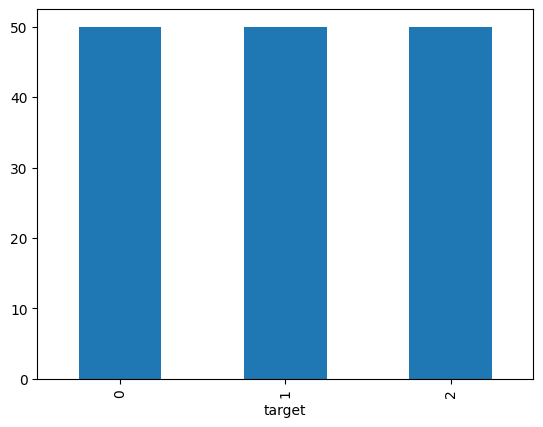

In [137]:
# See how many of each class in each dataset
iris_df.target.value_counts().plot.bar()

In [138]:
loaded_iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Demonstrate Logistic Regression Model usage
I will use the Logistic Regression model I created to predict if a given iris is a Virgnicia (i.e. it's target value is 2).
First, I'll setup a logger so I can capture the model's information during the training process.

In [139]:
import logging
import sys
date_strftime_format = "%Y-%m-%y %H:%M:%S"
logging.basicConfig(stream=sys.stdout, level=logging.INFO, format="%(asctime)s %(message)s", datefmt=date_strftime_format)

Since I'll be running the logistic model for several experiments, I'll put this process in a function, where I can change the hyperparameters.
I'll also make the target binary as the logistic regression model I built is a binary classifier.

The binary target is 1 if the iris is a Virgnica and 0 if it is not.

In [140]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from model.logistic_regression import LogisticRegressionCustomModel, accuracy_score

def run_iris_experiment(
        max_iterations=1000,
        learning_rate=0.01,
        tolerance=1e-6,
        plot_training_losses: bool = True,
        plot_training_accuracies: bool = False,
        log_level: int = logging.DEBUG
):
    print("Predicting the iris Virginica class using the custom logistic regression model")

    # Load the data and make the target binary
    iris = load_iris()
    X, y = iris.data, iris.target
    y_binary = (y != 2).astype(int)

    # Split the data into training and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

    iris_model = LogisticRegressionCustomModel(log_level=log_level)
    iris_model.fit(
        x_train=X_train,
        y_train=y_train,
        max_iterations=max_iterations,
        learning_rate=learning_rate,
        tolerance=tolerance
    )

    # View the training results
    print(f"{iris_model.weights=}")
    print(f"{iris_model.bias=}")

    # Make predictions on the test set
    iris_predictions = iris_model.predict(X_test)
    print(f"{iris_predictions=}")

    # The model's test accuracy
    iris_accuracy = accuracy_score(y_true=y_test, y_pred=iris_predictions)
    print(f"{iris_accuracy=}")

    if plot_training_losses:
        plt.title("Training Loss")
        plt.xlabel("Iteration")
        plt.ylabel("Loss")
        plt.plot(iris_model.train_losses)
        plt.show()

    if plot_training_accuracies:
        plt.title("Training Accuracy")
        plt.xlabel("Iteration")
        plt.ylabel("Accuracy")
        plt.plot(iris_model.train_accuracies)
        plt.show()


This first run simply shows how I can use my custom logistic regression model to train a classifier to predict whether an iris is a Virginica iris.

Predicting the iris Virginica class using the custom logistic regression model
2023-09-23 15:19:02 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=100
            learning_rate=0.01
            tolerance=1e-06
2023-09-23 15:19:02 0: accuracy=0.325 loss=13.98820443961383 loss_change=None gradient_magnitude=116.3227541154352
2023-09-23 15:19:02 1: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.1225816143722
2023-09-23 15:19:02 2: accuracy=0.325 loss=13.98820443961383 loss_change=7.253143043281245 gradient_magnitude=562.8989255527385
2023-09-23 15:19:02 3: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.59054913225305
2023-09-23 15:19:02 4: accuracy=0.6583333333333333 loss=7.080449160298357 loss_change=0.3453877639657721 gradient_magnitude=370.3635682258975
2023-09-23 15:19:02 5: accuracy=0.675 loss=6.7350613963325845 loss_change=0.3453877639657721 gradien

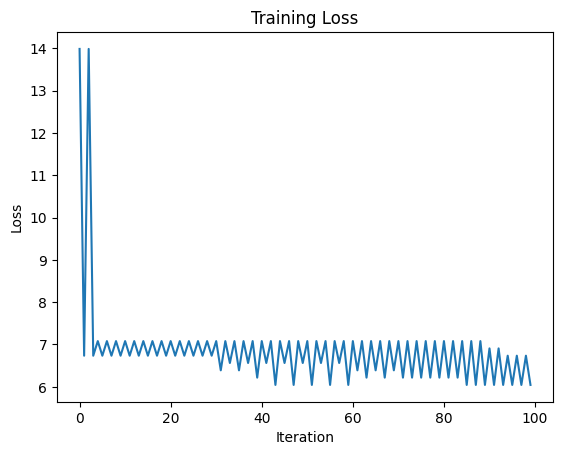

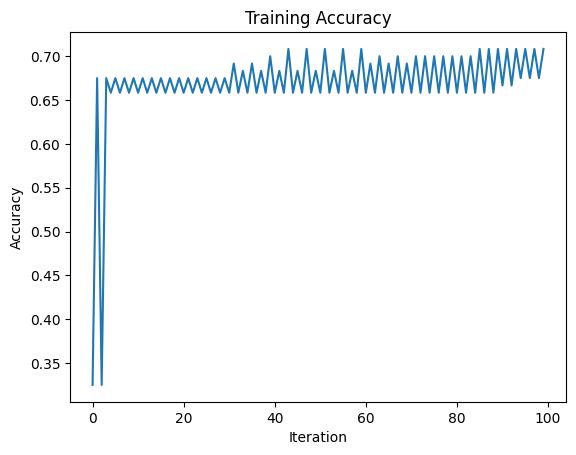

In [141]:
run_iris_experiment(
    max_iterations=100,
    plot_training_accuracies=True
)

Here, the 100 iterations achieved a 70% accuracy. As expected from the gradient descent optimisaion process, the training loss gradually decreased overtime and the training accuracy gradually increased overtime.

#### Increasing number of iterations to allow for better convergence
This time lets increase the number of iterations to 200.

Predicting the iris Virginica class using the custom logistic regression model
2023-09-23 15:19:03 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=200
            learning_rate=0.01
            tolerance=1e-06
2023-09-23 15:19:03 0: accuracy=0.325 loss=13.98820443961383 loss_change=None gradient_magnitude=116.3227541154352
2023-09-23 15:19:03 1: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.1225816143722
2023-09-23 15:19:03 2: accuracy=0.325 loss=13.98820443961383 loss_change=7.253143043281245 gradient_magnitude=562.8989255527385
2023-09-23 15:19:03 3: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.59054913225305
2023-09-23 15:19:03 4: accuracy=0.6583333333333333 loss=7.080449160298357 loss_change=0.3453877639657721 gradient_magnitude=370.3635682258975
2023-09-23 15:19:03 5: accuracy=0.675 loss=6.7350613963325845 loss_change=0.3453877639657721 gradien

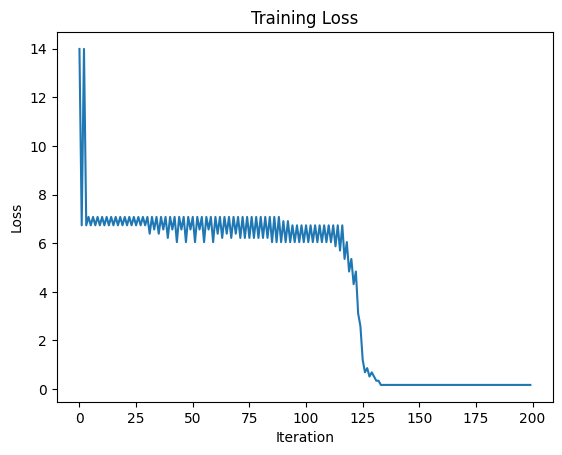

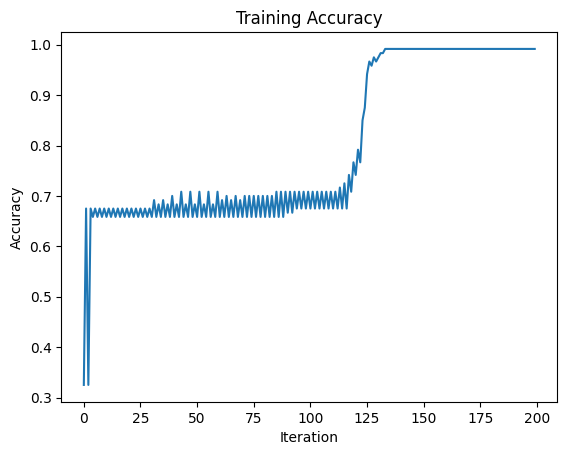

In [142]:
run_iris_experiment(
    max_iterations=200,
    plot_training_accuracies=True
)

Here, the training accuracy increased to 95% where it ended up scoring 100% accuracy on the test set.
Additionally, the loss decreased even further where it appears to reach a limit and can no longer learn anymore.
Perhaps this is the minimum loss.

#### Hit the convergence criteria
Now lets see if we can get the optimisation process to be terminated by the convergence criteria. For this, we can increase the max iterations to ensure it has enough iterations to reach our convergence criteria.

Predicting the iris Virginica class using the custom logistic regression model
2023-09-23 15:19:03 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=10000
            learning_rate=0.01
            tolerance=0.01
2023-09-23 15:19:03 0: accuracy=0.325 loss=13.98820443961383 loss_change=None gradient_magnitude=116.3227541154352
2023-09-23 15:19:03 1: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.1225816143722
2023-09-23 15:19:03 2: accuracy=0.325 loss=13.98820443961383 loss_change=7.253143043281245 gradient_magnitude=562.8989255527385
2023-09-23 15:19:03 3: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.59054913225305
2023-09-23 15:19:03 4: accuracy=0.6583333333333333 loss=7.080449160298357 loss_change=0.3453877639657721 gradient_magnitude=370.3635682258975
2023-09-23 15:19:03 5: accuracy=0.675 loss=6.7350613963325845 loss_change=0.3453877639657721 gradie

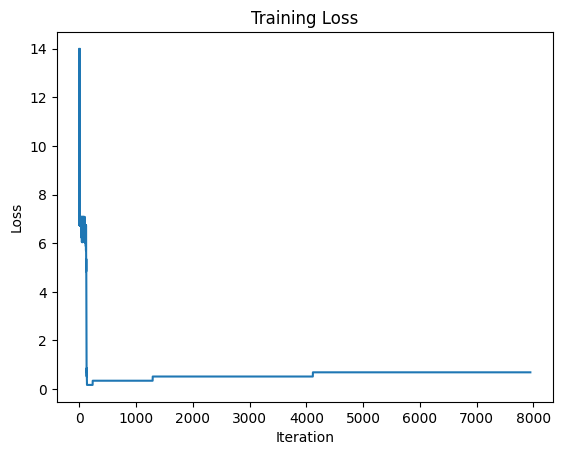

In [143]:
run_iris_experiment(
    max_iterations=10000,
    learning_rate=0.01,
    tolerance=0.01
)

Although the training accuracy here with 7950 iterations (97%) was better than the training accuracy with 200 iterations (95%), it performed worse on the test set with only a 93% accuracy. This could allude to potential overfitting from overtraining the model.

The repeated loss value indicates that after a certain point, the model can't learn anymore.
It's also interesting to note that the training accuracy decreased after many iterations which could be another indicator that the model is saturated and has learned all it can from the data.

#### Learning Rate
Lets see what happens if we set a large learning rate at 1 and a small learning rate at 0.0001

Predicting the iris Virginica class using the custom logistic regression model
2023-09-23 15:19:14 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=200
            learning_rate=1
            tolerance=1e-06
2023-09-23 15:19:14 0: accuracy=0.325 loss=13.98820443961383 loss_change=None gradient_magnitude=116.3227541154352
2023-09-23 15:19:14 1: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.59054968983907
2023-09-23 15:19:14 2: accuracy=0.325 loss=13.98820443961383 loss_change=7.253143043281245 gradient_magnitude=562.8998539926973
2023-09-23 15:19:14 3: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=361.59054968983907
2023-09-23 15:19:14 4: accuracy=0.6583333333333333 loss=7.080449160298357 loss_change=0.3453877639657721 gradient_magnitude=324.0173093155845
2023-09-23 15:19:14 5: accuracy=0.675 loss=6.7350613963325845 loss_change=0.3453877639657721 gradient_

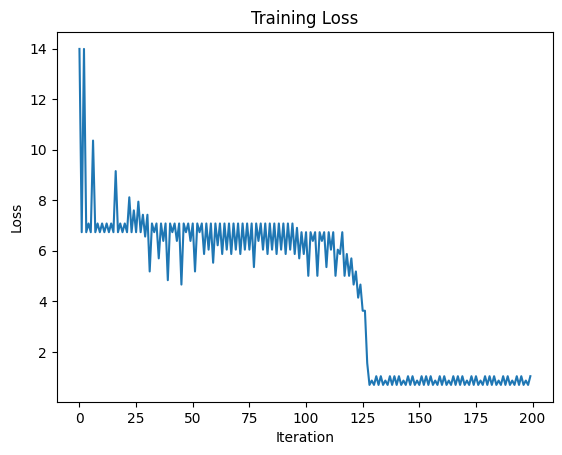

In [144]:
run_iris_experiment(
    max_iterations=200,
    learning_rate=1
)

Predicting the iris Virginica class using the custom logistic regression model
2023-09-23 15:19:14 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=200
            learning_rate=1e-05
            tolerance=1e-06
2023-09-23 15:19:14 0: accuracy=0.325 loss=13.98820443961383 loss_change=None gradient_magnitude=116.3227541154352
2023-09-23 15:19:14 1: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=114.75630450416021
2023-09-23 15:19:14 2: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=113.22520686742575
2023-09-23 15:19:14 3: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=111.72887202450468
2023-09-23 15:19:14 4: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=110.26671311330888
2023-09-23 15:19:14 5: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=108.83814594517709
2023-09-23 15:19:14 6: accuracy=0.

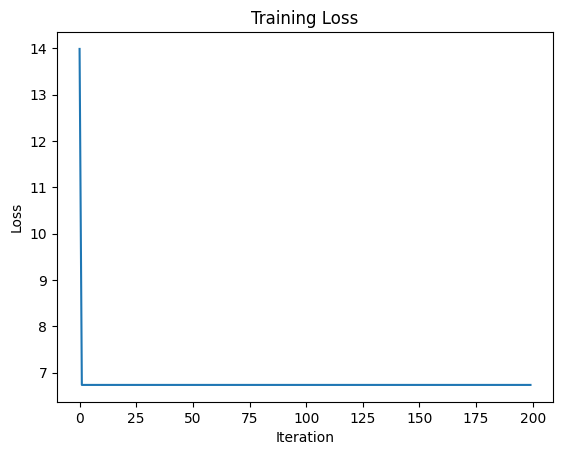

In [145]:
run_iris_experiment(
    max_iterations=200,
    learning_rate=0.00001
)

Here, the loss fluctuates a lot with the larger learning rate. This implies that the learning rate is too large and the optimisation process oscillates around the minimum.

However, the smaller learning rate resulted in a worser performing model. This is most likely due to the fact that a smaller learning rate means the model takes longer to converge and in this case hasn't had enough iterations to properly converge.

Increasing the number of iterations allows the model to eventually get closer convergence with the small learning rate.

Predicting the iris Virginica class using the custom logistic regression model
2023-09-23 15:19:15 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=4000
            learning_rate=1e-05
            tolerance=1e-06
2023-09-23 15:19:15 0: accuracy=0.325 loss=13.98820443961383 loss_change=None gradient_magnitude=116.3227541154352
2023-09-23 15:19:15 1: accuracy=0.675 loss=6.7350613963325845 loss_change=7.253143043281245 gradient_magnitude=114.75630450416021
2023-09-23 15:19:15 2: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=113.22520686742575
2023-09-23 15:19:15 3: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=111.72887202450468
2023-09-23 15:19:15 4: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=110.26671311330888
2023-09-23 15:19:15 5: accuracy=0.675 loss=6.7350613963325845 loss_change=0.0 gradient_magnitude=108.83814594517709
2023-09-23 15:19:15 6: accuracy=0

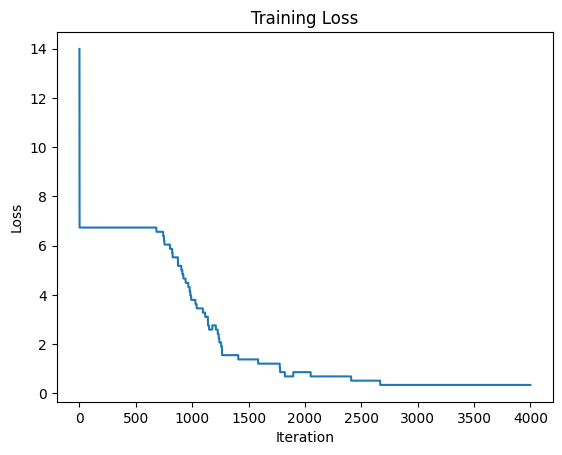

In [146]:
run_iris_experiment(
    max_iterations=4000,
    learning_rate=0.00001
)

#### Comparison with better logistic regression model
To put the simplicity of the custom logistic regression model into perspective lets use the scikit-learn model for the iris Virginica class predictions.

In [147]:
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target
y_binary = (y != 2).astype(int)

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

iris_model = LogisticRegression()
iris_model.fit(X_train, y_train)
predictions = iris_model.predict(X_test)
accuracy_score(y_test, predictions)

1.0

The scikit-learn logistic regression model significantly outperforms the custom one since it managed to achieve great accuracy with only 100 iterations (since 100 is the default value for the maximum iterations). Keep in mind, that scikit-learn logistic regression model is vastly more complex than the custom one. The custom logistic regression model was built with the intention of understanding the fundamentals of logistic regression.

In [148]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from model.logistic_regression import LogisticRegressionCustomModel, accuracy_score

print("Predicting whether an image instance has breast cancer")

# Load the data and make the target binary
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

breast_cancer_model = LogisticRegressionCustomModel(log_level=logging.DEBUG)
breast_cancer_model.fit(
    x_train=X_train,
    y_train=y_train,
    max_iterations=10000,
    learning_rate=0.1
)

# View the training results
print(f"{breast_cancer_model.weights=}")
print(f"{breast_cancer_model.bias=}")
print(f"{breast_cancer_model.train_accuracies[-1]=}")

# Make predictions on the test set
breast_cancer_predictions = breast_cancer_model.predict(X_test)
print(f"{breast_cancer_predictions=}")

# View the model accuracy
breast_cancer_accuracy= accuracy_score(y_true=y_test, y_pred=breast_cancer_predictions)
print(f"{breast_cancer_accuracy=}")


Predicting whether an image instance has breast cancer
2023-09-23 15:19:21 Fitting Model to training data.
            Using Hyperparameters:
            max_iterations=10000
            learning_rate=0.1
            tolerance=1e-06
2023-09-23 15:19:21 0: accuracy=0.37142857142857144 loss=13.026052811423458 loss_change=None gradient_magnitude=42101.59029283012
2023-09-23 15:19:21 1: accuracy=0.37142857142857144 loss=13.026052811423458 loss_change=0.0 gradient_magnitude=211570.90482733867
2023-09-23 15:19:21 2: accuracy=0.6285714285714286 loss=7.697213024522954 loss_change=5.328839786900504 gradient_magnitude=291722.6391423261
2023-09-23 15:19:21 3: accuracy=0.37142857142857144 loss=13.026052811423458 loss_change=5.328839786900504 gradient_magnitude=211570.90482733867
2023-09-23 15:19:21 4: accuracy=0.6285714285714286 loss=7.697213024522954 loss_change=5.328839786900504 gradient_magnitude=291722.6391423261
2023-09-23 15:19:21 5: accuracy=0.37142857142857144 loss=13.026052811423458 loss_

## Conclusion
This study provided me with a fundamental understanding of Logistic Regression. Here, basic concepts were covered such as
- Logit function
- Logistic function
- Binary Cross Entropy Loss
- Gradient Descent

I enjoyed learning the mathematics behind the model, and found that experimenting with the model, helpful for understanding the role of the hyperparameters, learning rate, maximum number of iterations and tolerance. I learnt that computing practicalities need to be considered when translating theoretical concepts to usable solutions. Such considerations include numerical stability and the tradeoff of efficiency and accuracy.

## References
Hansen, C. (2022, February 14). *Implementing logistic regression from scratch in Python*. IBM. <https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/>

Jurafsky, D. (2021, July 20). *Logistic Regression 4 Cross Entropy Loss* [Video]. YouTube. <https://www.youtube.com/watch?v=TDOCw0L-qz0&ab_channel=FromLanguagestoInformation>

OpenAI. (2023). *ChatGPT* (ChatGPT August 3 Version). [Large Language Model]. <https://chat.openai.com>

Pampel, F. (2021). *The logic of logistic regression*. SAGE Publications, Inc., <https://doi.org/10.4135/9781071878729>

Starmer, J. (2018, March 6). *StatQuest: Logistic Regression*[Video]. YouTube. <https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe&ab_channel=StatQuestwithJoshStarmer>

Strang, G. (1988). Introduction to Linear Algebra. Wellesley-Cambridge Press.

Vieira, T. (2014, February 11). Exp-normalize trick. *Graduate Descent*. <https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/>



## Appendix

### ChatGPT Conversation
2023 September 10 - 2023 September 18
<https://chat.openai.com/share/618b22fb-b97b-4db7-950c-d36f0a58dd9b>